# (Ford GoBike DataSet)
## by (Shady Ahmed Bedier)


## Table of Contents
<ul>
<li><a href="#intro">Introduction and important packages</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>


<a id='intro'></a>
## Introduction and important packages

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..

In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('FordgoBikeData.csv')

In [3]:
# The strcture of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# No of Unique values
for _ in df.columns:
    print(_,len(df[_].unique()))
    print((df[_].unique()),'\n')

duration_sec 4752
[52185 42521 61854 ... 13251  5713  2822] 

start_time 183401
['2019-02-28 17:32:10.1450' '2019-02-28 18:53:21.7890'
 '2019-02-28 12:13:13.2180' ... '2019-02-01 00:06:05.5490'
 '2019-02-01 00:05:34.3600' '2019-02-01 00:00:20.6360'] 

end_time 183397
['2019-03-01 08:01:55.9750' '2019-03-01 06:42:03.0560'
 '2019-03-01 05:24:08.1460' ... '2019-02-01 00:08:27.2200'
 '2019-02-01 00:07:54.2870' '2019-02-01 00:04:52.0580'] 

start_station_id 330
[ 21.  23.  86. 375.   7.  93. 300.  10.  19. 370.  44. 127. 252. 243.
 349. 131.  74. 321. 180.  72. 163. 190.   6.  78. 258. 238.  28. 109.
  98. 133. 113. 220. 122.  58.  87.  15. 104.  27.   9. 140. 310.  53.
 106. 340. 121.  11. 240.  61.  36.  34.  13. 345.  43. 239. 182. 119.
 369. 159. 254.  30. 356. 324.  71.  67. 250. 245. 377. 317. 219. 274.
  77. 129. 253. 386.  95. 183.   5. 137.  73. 176. 197. 136.  33.  59.
 115. 280. 262. 368. 385.  90. 112. 160.   4. 247.  97. 308.  75. 123.
 172. 114. 244.   8.  55.  31.  62. 125.  

['Customer' 'Subscriber'] 

member_birth_year 76
[1984.   nan 1972. 1989. 1974. 1959. 1983. 1988. 1992. 1996. 1993. 1990.
 1981. 1975. 1978. 1991. 1997. 1986. 2000. 1982. 1995. 1980. 1973. 1985.
 1971. 1979. 1967. 1998. 1994. 1977. 1999. 1987. 1969. 1963. 1976. 1964.
 1965. 1961. 1968. 1966. 1962. 1954. 1958. 1960. 1970. 1956. 1957. 1945.
 1900. 1952. 1948. 1951. 1941. 1950. 1949. 1953. 1955. 1946. 1947. 1931.
 1943. 1942. 1920. 1933. 2001. 1878. 1901. 1944. 1928. 1934. 1939. 1930.
 1902. 1910. 1938. 1927.] 

member_gender 4
['Male' nan 'Other' 'Female'] 

bike_share_for_all_trip 2
['No' 'Yes'] 



In [10]:
df.duplicated().sum()

0

### Notes
- There are null values (start_station_id, start_station_name,end_station_id,end_station_name, member_birth_year, member_gender)
- Data type not appropriate for columns(start_time, end_time, start_station_id,end_station_id,member_birth_year)
- columns need to check (member_birth_year,member_gender)
- Modification of date/time features
- Latitiude and Longituide for start and end station need to be modified to be easy to understand
- There are no duplicates

In [11]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
7281,766,2019-02-28 09:07:55.7610,2019-02-28 09:20:42.4780,86.0,Market St at Dolores St,37.769305,-122.426826,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6293,Subscriber,1985.0,Male,No
98425,213,2019-02-15 07:52:41.7970,2019-02-15 07:56:15.2010,25.0,Howard St at 2nd St,37.787522,-122.397405,50.0,2nd St at Townsend St,37.780526,-122.390288,4804,Subscriber,1994.0,Male,No
122788,197,2019-02-11 10:38:27.3250,2019-02-11 10:41:45.0480,296.0,5th St at Virginia St,37.325998,-121.877120,317.0,San Salvador St at 9th St,37.333955,-121.877349,3945,Subscriber,1995.0,Male,Yes
167936,664,2019-02-04 16:32:19.4400,2019-02-04 16:43:23.6810,22.0,Howard St at Beale St,37.789756,-122.394643,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,167,Subscriber,1980.0,Female,No
34399,465,2019-02-24 01:23:09.2800,2019-02-24 01:30:54.3570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,6091,Subscriber,1995.0,Female,No


## Data Cleaning

## 1- Remove the Null values

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## 2- Creating new column ' member_age' from 'member_birth_year'

In [14]:
df['member_age'] =  datetime.now().year - df.member_birth_year 

In [15]:
df = df.astype({"member_age":'int'})

In [16]:
df['member_age'].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

In [17]:
df.drop(df[(df.member_age >80)].index, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174749 non-null int64
start_time                 174749 non-null object
end_time                   174749 non-null object
start_station_id           174749 non-null float64
start_station_name         174749 non-null object
start_station_latitude     174749 non-null float64
start_station_longitude    174749 non-null float64
end_station_id             174749 non-null float64
end_station_name           174749 non-null object
end_station_latitude       174749 non-null float64
end_station_longitude      174749 non-null float64
bike_id                    174749 non-null int64
user_type                  174749 non-null object
member_birth_year          174749 non-null float64
member_gender              174749 non-null object
bike_share_for_all_trip    174749 non-null object
member_age                 174749 non-null int32
dtypes: float64(7), int32(1), int64

## 3- Modification of date/time features

In [19]:
df['start_time']= pd.to_datetime(df['start_time'])
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')

df['start_month'] =  df.start_time.dt.strftime('%B')


df['start_weekDay'] = df.start_time.dt.strftime('%A')


df['start_day'] = df.start_time.dt.strftime('%d')


df['start_hour'] = df.start_time.dt.strftime('%H')
df['end_time']= pd.to_datetime(df['end_time'])

df['end_hour'] = df.end_time.dt.strftime('%H')

df['duration_min'] = df['duration_sec']/60

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 24 columns):
duration_sec               174749 non-null int64
start_time                 174749 non-null datetime64[ns]
end_time                   174749 non-null datetime64[ns]
start_station_id           174749 non-null float64
start_station_name         174749 non-null object
start_station_latitude     174749 non-null float64
start_station_longitude    174749 non-null float64
end_station_id             174749 non-null float64
end_station_name           174749 non-null object
end_station_latitude       174749 non-null float64
end_station_longitude      174749 non-null float64
bike_id                    174749 non-null int64
user_type                  174749 non-null object
member_birth_year          174749 non-null float64
member_gender              174749 non-null object
bike_share_for_all_trip    174749 non-null object
member_age                 174749 non-null int32
start_date         

In [21]:
col=['start_day', 'start_hour', 'end_hour']
for c in col:
    df[c] = pd.to_numeric(df[c])

In [22]:
# Change the date columns from object to 'datetime' dtype..
df['start_date'] = pd.to_datetime(df['start_date'])

In [23]:
# Create a (day_shift) column
df['day_shift']= 'Morning'
df['day_shift'][(df['start_hour'] >= 8) & (df['start_hour'] <= 16)] = 'Work'
df['day_shift'][(df['start_hour'] >= 17) & (df['start_hour'] <= 23)] = 'Night'

C:\Users\shady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shady\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [24]:
df['day_shift'].unique()

array(['Night', 'Work', 'Morning'], dtype=object)

## 4- Create Haversine function to transfere latitude-longitude to distance

In [25]:
#Changing data type of station features.
df = df.astype({"start_station_id":'int', "end_station_id":'int'})  

In [26]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
#recode it to be function
def Haversine(lat1,lon1,lat2,lon2, **kwarg):
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    return round(d,4)

In [27]:
# How it work
Haversine(52.2296756,21.0122287,52.406374,16.9251681)

278.4586

In [28]:
# Create the distance Column using Haversine Fuction above..
df['distance'] = df.apply(lambda x: Haversine(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [29]:
df['distance'].describe()

count    174749.000000
mean          1.690470
std           1.096676
min           0.000000
25%           0.911000
50%           1.429800
75%           2.224600
max          69.469300
Name: distance, dtype: float64

In [30]:
df.drop(df[(df.distance ==0)].index, inplace = True)

In [31]:
df['distance'].describe()

count    171293.000000
mean          1.724577
std           1.080807
min           0.013300
25%           0.938700
50%           1.454700
75%           2.249200
max          69.469300
Name: distance, dtype: float64

## 5-Create new data set by droping unnessery columns

In [32]:
#dropfrit unneeded from object
df.drop(columns = ['duration_sec','member_birth_year','start_month'],inplace = True)

In [33]:
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,bike_share_for_all_trip,member_age,start_date,start_weekDay,start_day,start_hour,end_hour,duration_min,day_shift,distance
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,...,No,37,2019-02-28,Thursday,28,17,8,869.750000,Night,0.5447
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,No,49,2019-02-28,Thursday,28,12,5,1030.900000,Work,2.7045
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,...,No,32,2019-02-28,Thursday,28,17,4,608.166667,Night,0.2607
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,...,Yes,47,2019-02-28,Thursday,28,23,0,26.416667,Night,2.4093
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,...,No,62,2019-02-28,Thursday,28,23,0,29.883333,Night,3.3322


## The structure of the new dataset

### Rearrang dataset (According to features come from)

In [34]:
df_New=df[['start_time','start_date','start_weekDay','start_day','start_hour','day_shift','end_time','end_hour','duration_min','bike_id','bike_share_for_all_trip','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','distance' ,'user_type','member_gender','member_age']]

In [35]:
# Visualize sample of the data..
df_New.head()

,start_time,start_date,start_weekDay,start_day,start_hour,day_shift,end_time,end_hour,duration_min,bike_id,...,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,distance,user_type,member_gender,member_age
0,2019-02-28 17:32:10.145,2019-02-28,Thursday,28,17,Night,2019-03-01 08:01:55.975,8,869.750000,4902,...,37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,0.5447,Customer,Male,37
2,2019-02-28 12:13:13.218,2019-02-28,Thursday,28,12,Work,2019-03-01 05:24:08.146,5,1030.900000,5905,...,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2.7045,Customer,Male,49
3,2019-02-28 17:54:26.010,2019-02-28,Thursday,28,17,Night,2019-03-01 04:02:36.842,4,608.166667,6638,...,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,0.2607,Subscriber,Other,32
4,2019-02-28 23:54:18.549,2019-02-28,Thursday,28,23,Night,2019-03-01 00:20:44.074,0,26.416667,4898,...,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,2.4093,Subscriber,Male,47
5,2019-02-28 23:49:58.632,2019-02-28,Thursday,28,23,Night,2019-03-01 00:19:51.760,0,29.883333,5200,...,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,3.3322,Subscriber,Male,62


In [36]:
df_New.describe()

,start_day,start_hour,end_hour,duration_min,bike_id,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,distance,member_age
count,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000,171293.000000
mean,15.303533,13.445342,13.594870,11.372982,4482.156270,138.339693,37.771483,-122.352239,135.911257,37.771682,-122.351806,1.724577,36.119824
std,8.039365,4.739423,4.752011,25.585809,1660.044699,111.251320,0.099630,0.116987,110.930039,0.099531,0.116540,1.080807,9.832302
min,1.000000,0.000000,0.000000,1.016667,11.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,0.013300,20.000000
25%,8.000000,9.000000,9.000000,5.383333,3796.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,0.938700,29.000000
50%,15.000000,14.000000,14.000000,8.466667,4960.000000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397437,1.454700,34.000000
75%,22.000000,17.000000,18.000000,12.983333,5505.000000,239.000000,37.797320,-122.283127,233.000000,37.797320,-122.287610,2.249200,41.000000
max,28.000000,23.000000,23.000000,1409.133333,6645.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,69.469300,80.000000


In [37]:
# No of Unique values
for _ in df_New.columns:
    print(_,len(df_New[_].unique()))
    print((df_New[_].unique()),'\n')

start_time 171283
['2019-02-28T17:32:10.145000000' '2019-02-28T12:13:13.218000000'
 '2019-02-28T17:54:26.010000000' ... '2019-02-01T00:06:05.549000000'
 '2019-02-01T00:05:34.360000000' '2019-02-01T00:00:20.636000000'] 

start_date 28
['2019-02-28T00:00:00.000000000' '2019-02-27T00:00:00.000000000'
 '2019-02-26T00:00:00.000000000' '2019-02-25T00:00:00.000000000'
 '2019-02-24T00:00:00.000000000' '2019-02-23T00:00:00.000000000'
 '2019-02-22T00:00:00.000000000' '2019-02-21T00:00:00.000000000'
 '2019-02-20T00:00:00.000000000' '2019-02-19T00:00:00.000000000'
 '2019-02-18T00:00:00.000000000' '2019-02-17T00:00:00.000000000'
 '2019-02-16T00:00:00.000000000' '2019-02-15T00:00:00.000000000'
 '2019-02-14T00:00:00.000000000' '2019-02-13T00:00:00.000000000'
 '2019-02-12T00:00:00.000000000' '2019-02-11T00:00:00.000000000'
 '2019-02-10T00:00:00.000000000' '2019-02-09T00:00:00.000000000'
 '2019-02-08T00:00:00.000000000' '2019-02-07T00:00:00.000000000'
 '2019-02-06T00:00:00.000000000' '2019-02-05T00:00:

[37.7896254  37.7693053  37.77483629 37.80456235 37.7704074  37.3172979
 37.79539294 37.788975   37.78732677 37.7810737  37.7567083  37.8693603
 37.78100972 37.75500026 37.77643482 37.7801457  37.772406   37.7973195
 37.8302232  37.80477    37.8723555  37.8717192  37.78716801 37.7633158
 37.765052   37.764555   37.8113514  37.760299   37.776619   37.769757
 37.795392   37.76704458 37.7880593  37.79857211 37.7478584  37.335885
 37.775946   37.7632417  37.849735   37.7592103  37.7765126  37.78383
 37.7839879  37.7664827  37.7787677  37.8688126  37.8090126  37.7610471
 37.88022245 37.776598   37.76918818 37.78829998 37.7730627  37.7766392
 37.7737172  37.873558   37.870139   37.8658466  37.77191688 37.333955
 37.8575672  37.7735069  37.758862   37.86641794 37.75210498 37.7662185
 37.8087021  37.78389936 37.750506   37.7717933  37.82840997 37.8088479
 37.7544356  37.7816495  37.78734902 37.774814   37.7650259  37.33712237
 37.86996671 37.78543383 37.8660431  37.8505777  37.771058   37.7638

In [38]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171293 entries, 0 to 183411
Data columns (total 23 columns):
start_time                 171293 non-null datetime64[ns]
start_date                 171293 non-null datetime64[ns]
start_weekDay              171293 non-null object
start_day                  171293 non-null int64
start_hour                 171293 non-null int64
day_shift                  171293 non-null object
end_time                   171293 non-null datetime64[ns]
end_hour                   171293 non-null int64
duration_min               171293 non-null float64
bike_id                    171293 non-null int64
bike_share_for_all_trip    171293 non-null object
start_station_id           171293 non-null int32
start_station_name         171293 non-null object
start_station_latitude     171293 non-null float64
start_station_longitude    171293 non-null float64
end_station_id             171293 non-null int32
end_station_name           171293 non-null object
end_station_latitu

## Ford GoBike Data Set  - After  Wrangling & first Cleaning -
### What is the structure of your dataset?

> The Data set contains 171,293 rows with 23 variables (columns) on each row. 
> Data type of variables are datetime64(3), float64(7), int32(2), int64(4), object(7)
> Data time features (start_time,start_date,start_weekDay,start_day,start_hour,day_shift,end_time,end_hour,duration_min)
  Bike features(bike_id,bike_share_for_all_trip)
  Station features( start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id, end_station_name,end_station_latitude,end_station_longitude,distance)
  Member_features(user_type,member_gender,member_age)

### What is/are the main feature(s) of interest in your dataset?

>  My interest is to find the relation between Ride Data/time features ,distance and Member_features

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Data time features (start_weekDay,start_day,start_hour,day_shift,duration_min)
  Bike features(bike_share_for_all_trip)
  Station features(start_station_name,distance)
  Member_features(user_type,member_gender,member_age)

<a id='eda'></a>
## Exploratory Data Analysis

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [39]:
days_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday','Sunday']

In [40]:
b_color = sb.color_palette()[0]
#,color = b_color

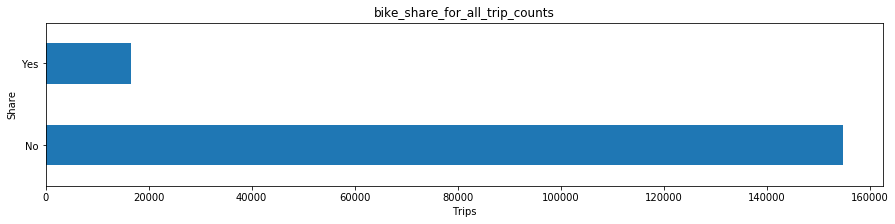

In [41]:
fig, ax = plt.subplots()
ax=df_New['bike_share_for_all_trip'].value_counts().plot(kind='barh',title='bike_share_for_all_trip_counts',figsize=(15,3),color = b_color)
ax.set(xlabel='Trips')
ax.set(ylabel='Share')
plt.show()

The most trips not shareed by the users they need more motivations to do more share

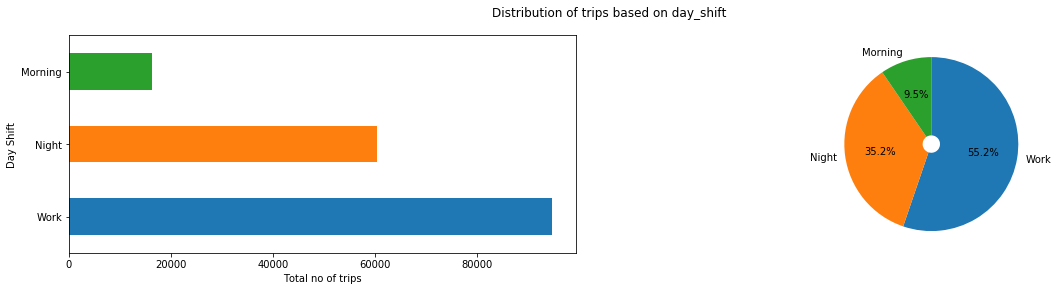

In [42]:
sorted_counts = df_New['day_shift'].value_counts()
plt.suptitle('Distribution of trips based on day_shift')
plt.subplot(1, 2, 1)
sorted_counts.plot(kind='barh',figsize=(20,4))
plt.ylabel('Day Shift')
plt.xlabel('Total no of trips')
plt.subplot(1, 2, 2)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False, wedgeprops = {'width' : 0.9}, autopct='%1.1f%%')
plt.show()

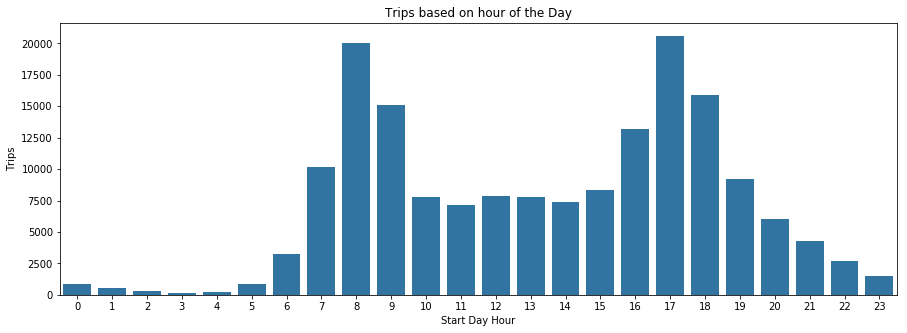

In [43]:
df_New.groupby('start_hour').count()
plt.figure(figsize=[15, 5]);
sb.countplot(data=df_New, x='start_hour', color=b_color);
plt.xlabel('Start Day Hour')
plt.ylabel('Trips')
plt.title('Trips based on hour of the Day');

from two figures above
 - The most trips are in work shift from 8a.m. to 4p.m .
 - at 5 pm users finish there work and start to go back homes

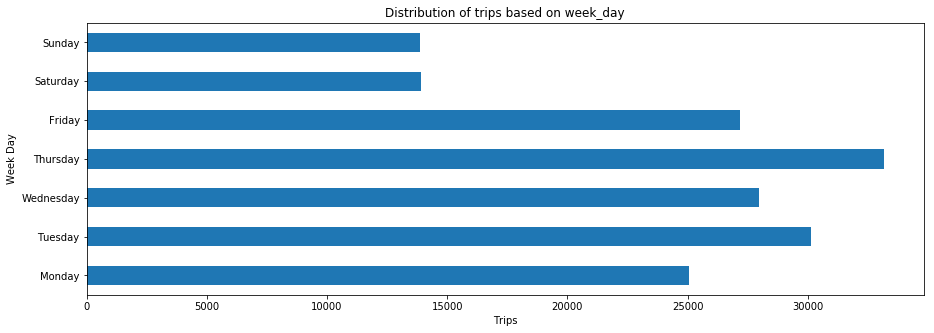

In [44]:
fig, ax = plt.subplots()
sorted_days = pd.Categorical(df_New['start_weekDay'], categories=days_name,ordered=True)
sorted_counts=sorted_days.value_counts()
sorted_counts=sorted_counts.sort_index()
ax=sorted_counts.plot(kind='barh',title='Distribution of trips based on week_day',figsize=(15,5),color = b_color)
plt.ylabel('Week Day')
plt.xlabel('Trips')
plt.show()

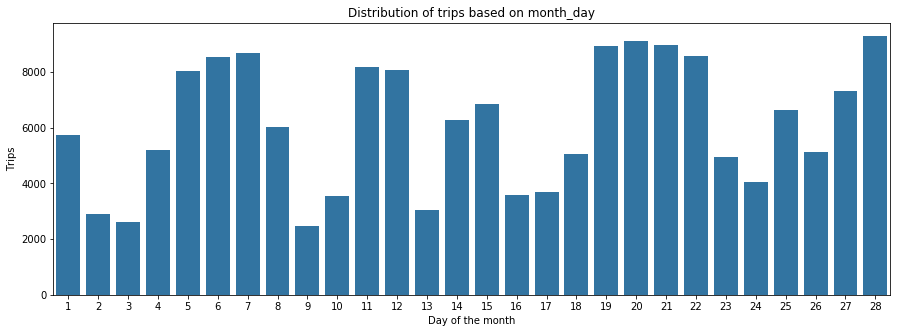

In [45]:
df_New.groupby('start_day').count()
plt.figure(figsize=[15, 5]);
sb.countplot(data=df_New, x='start_day', color=b_color);
plt.xlabel('Day of the month')
plt.ylabel('Trips')
plt.title('Distribution of trips based on month_day');

from two figures above
 - The most trips are in work days.
 - Weekends may be are (Sunday & Saturday)
 -  days(2,3,9,10,16,17,23,24)are(Sunday or Saturday)from calender. (;

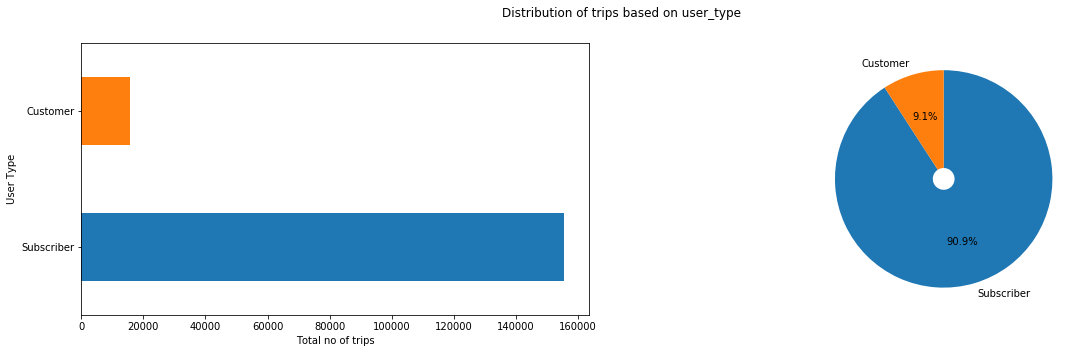

In [46]:
sorted_counts = df_New['user_type'].value_counts()
plt.suptitle('Distribution of trips based on user_type')
plt.subplot(1, 2, 1)
sorted_counts.plot(kind='barh',figsize=(20,5))
plt.ylabel('User Type')
plt.xlabel('Total no of trips')
plt.subplot(1, 2, 2)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False, wedgeprops = {'width' : 0.9}, autopct='%1.1f%%')
plt.show()

The most users are subscriber 

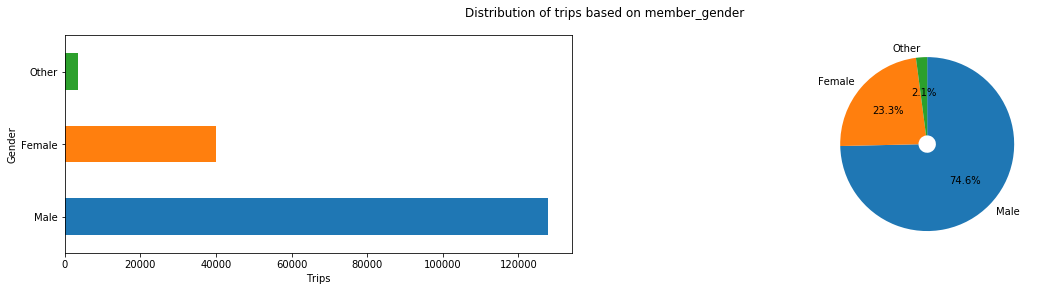

In [47]:
sorted_counts = df_New['member_gender'].value_counts()
plt.suptitle('Distribution of trips based on member_gender')
plt.subplot(1, 2, 1)
sorted_counts.plot(kind='barh',figsize=(20,4))
plt.ylabel('Gender')
plt.xlabel('Trips')
plt.subplot(1, 2, 2)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False, wedgeprops = {'width' : 0.9}, autopct='%1.1f%%')
plt.show()

Its clear that most of members are male with 74.6%

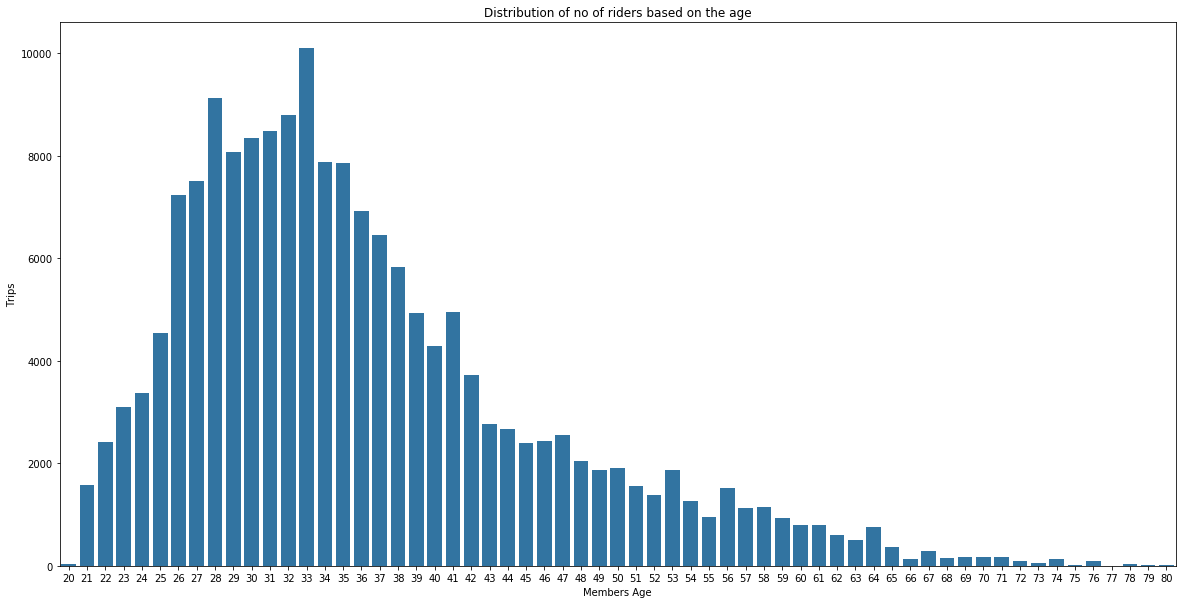

In [48]:
# Countplot to visualize MembersAges usage of Bike trips..
plt.figure(figsize=(20,10))
bin_size = np.arange(0,100, 2)
sb.countplot(data = df_New , x = 'member_age', color = b_color)
plt.xlabel('Members Age')
plt.ylabel('Trips')
plt.title('Distribution of no of riders based on the age');

Its clear that most of members are youth

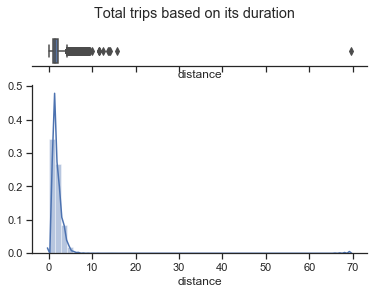

In [60]:

sb.set(style="ticks")

x = df_New['distance']
figure,(ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.15, .85)})
plt.suptitle('Total trips based on its duration')
sb.boxplot(x, ax=ax_box)

sb.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sb.despine(ax=ax_hist)
sb.despine(ax=ax_box, left=True)

plt.show();

'distance' feature has outlaier need to remove

In [61]:
df_New.drop(df_New[(df_New.distance >9)].index, inplace = True)

C:\Users\shady\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


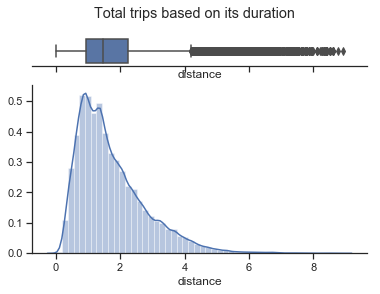

In [62]:

sb.set(style="ticks")

x = df_New['distance']
figure,(ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.15, .85)})
plt.suptitle('Total trips based on its duration')
sb.boxplot(x, ax=ax_box)

sb.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sb.despine(ax=ax_hist)
sb.despine(ax=ax_box, left=True)

plt.show();

In [63]:
df_New['distance'].describe()

count    171272.000000
mean          1.723130
std           1.063723
min           0.013300
25%           0.938400
50%           1.454700
75%           2.249100
max           8.924500
Name: distance, dtype: float64

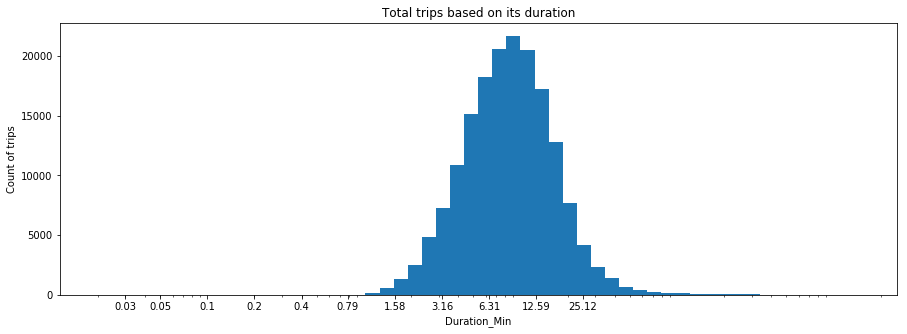

In [49]:
binsize = .1
log_binsize = 0.09
bins = 10 ** np.arange(-1.7, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)

plt.xscale('log')
bins = np.around(10 ** np.arange(-1.6, 1.5, .3), 2)
plt.xticks(bins, bins)
plt.xlabel('Duration_Min')
plt.ylabel('Count of trips')
plt.title('Total trips based on its duration')
plt.show()

- the most trips duration are between 1 to 26 minutes.

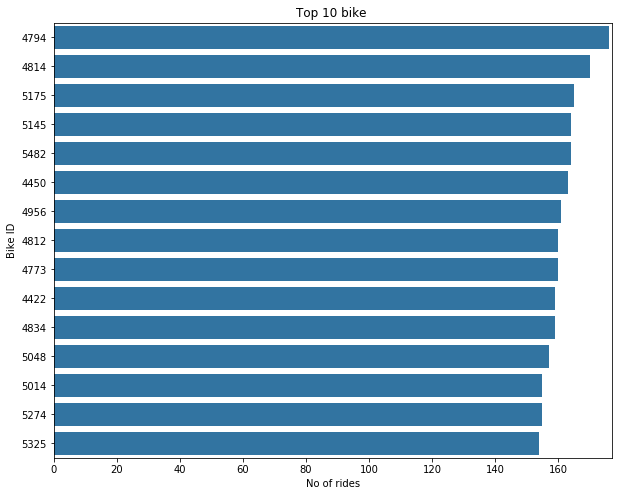

In [50]:
sorted_counts = df_New['bike_id'].value_counts()
sorted_order = sorted_counts.index
plt.figure(figsize=[10, 8])
plt.xlim(0,df_New['bike_id'].value_counts().max() + 1)
sb.countplot(data = df, y = 'bike_id', order = sorted_order[0:15], color=b_color)
plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 bike ');

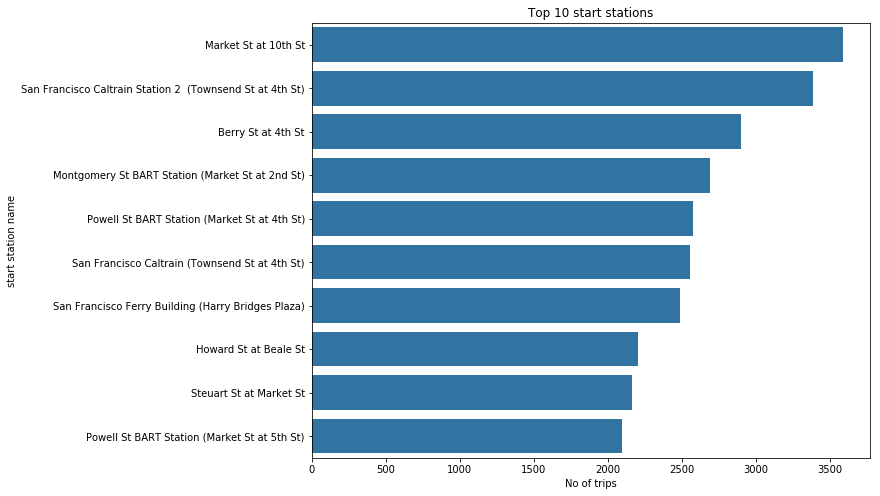

In [51]:
sorted_counts = df_New['start_station_name'].value_counts()
sorted_order = sorted_counts.index
plt.figure(figsize=[10, 8])
sb.countplot(data = df_New, y = 'start_station_name', order = sorted_order[:10], color=b_color)
plt.xlabel('No of trips')
plt.ylabel('start station name')
plt.title('Top 10 start stations');

Market st is prefeared start point to take ride

## Bivariate Exploration
> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

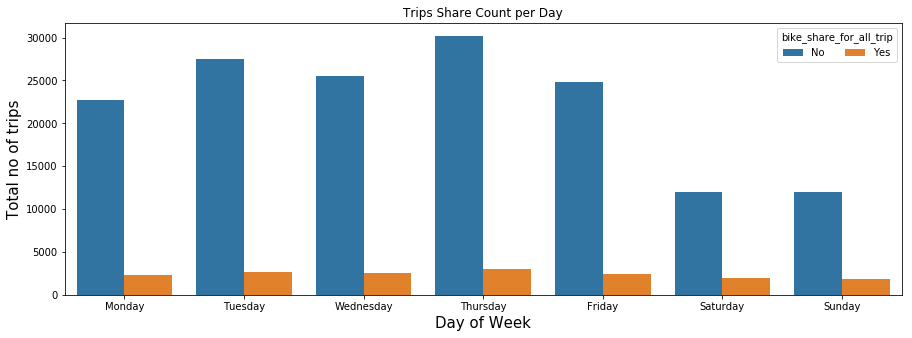

In [52]:
plt.figure(figsize = [15,5])
ax = sb.countplot(data =df_New, x = 'start_weekDay', hue = 'bike_share_for_all_trip', order = days_name)
plt.legend(loc = 1, ncol = 3, title = 'bike_share_for_all_trip')
plt.xticks(rotation = 0)
plt.title('Trips Share Count per Day')
plt.xlabel('Day of Week', size = 15);
ax.set_ylabel("Total no of trips", size = 15);

I think that the rates are close in different days, and there is no evidence of the days affecting the shareing process

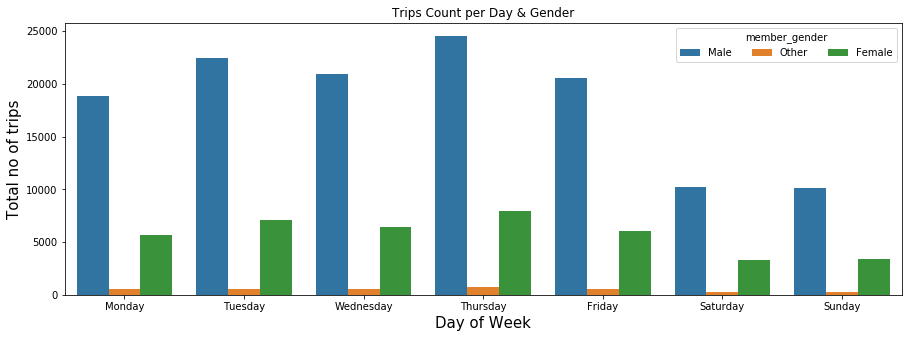

In [53]:
plt.figure(figsize = [15,5])

ax = sb.countplot(data =df_New, x = 'start_weekDay', hue = 'member_gender', order = days_name)
plt.legend(loc = 1, ncol = 3, title = 'member_gender')
plt.xticks(rotation = 0)
plt.title('Trips Count per Day & Gender')
plt.xlabel('Day of Week', size = 15);
ax.set_ylabel("Total no of trips", size = 15);

Males completely dominate females throughout the week days

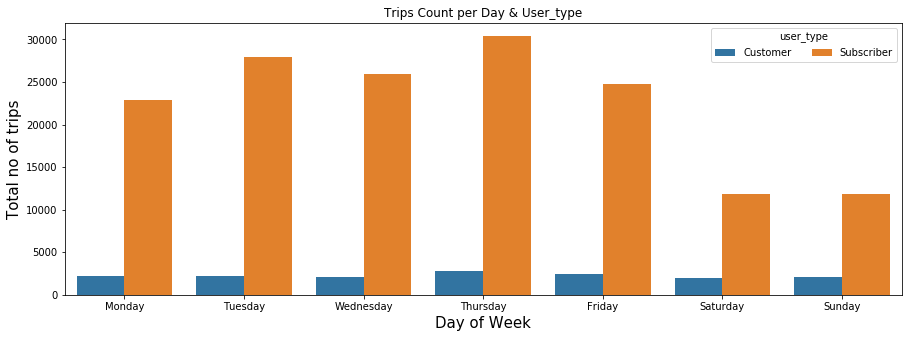

In [54]:
plt.figure(figsize = [15,5])
ax = sb.countplot(data =df_New, x = 'start_weekDay', hue = 'user_type', order = days_name)
plt.legend(loc = 1, ncol = 3, title = 'user_type')
plt.xticks(rotation = 0)
plt.title('Trips Count per Day & User_type')
plt.xlabel('Day of Week', size = 15);
ax.set_ylabel("Total no of trips", size = 15);

Subscriber users completely dominate Customer users throughout the week days

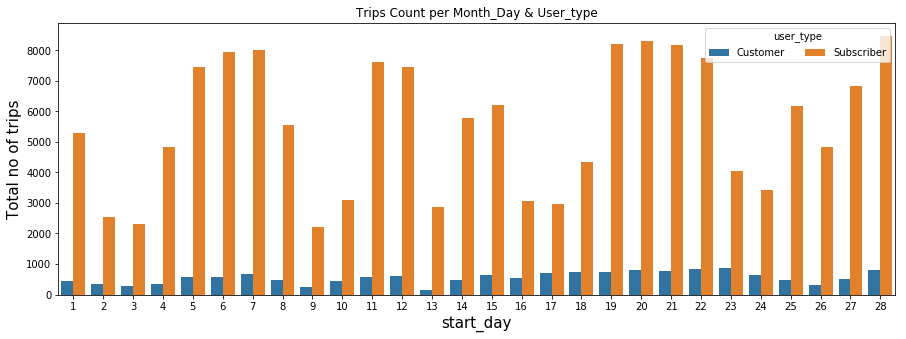

In [55]:
plt.figure(figsize = [15,5])
ax = sb.countplot(data =df_New, x = 'start_day', hue = 'user_type')
plt.legend(loc = 1, ncol = 3, title = 'user_type')
plt.xticks(rotation = 0)
plt.title('Trips Count per Month_Day & User_type')
plt.xlabel('start_day', size = 15);
ax.set_ylabel("Total no of trips", size = 15);

Subscriber users completely dominate Customer users throughout the month days

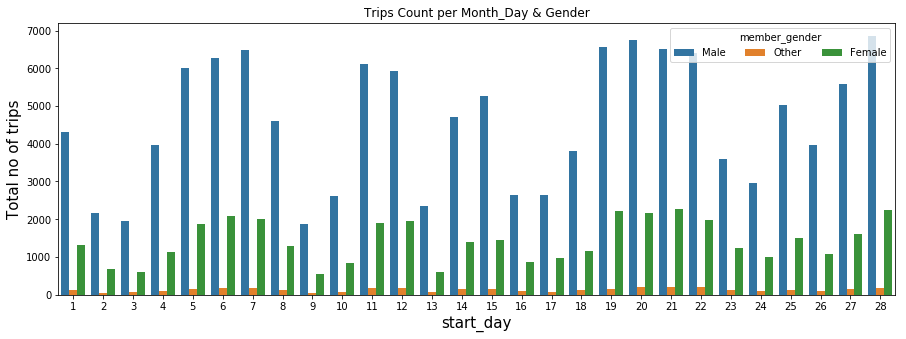

In [56]:
plt.figure(figsize = [15,5])
ax = sb.countplot(data =df_New, x = 'start_day', hue = 'member_gender')
plt.legend(loc = 1, ncol = 3, title = 'member_gender')
plt.xticks(rotation = 0)
plt.title('Trips Count per Month_Day & Gender')
plt.xlabel('start_day', size = 15);
ax.set_ylabel("Total no of trips", size = 15);

Males completely dominate Females throughout the month days

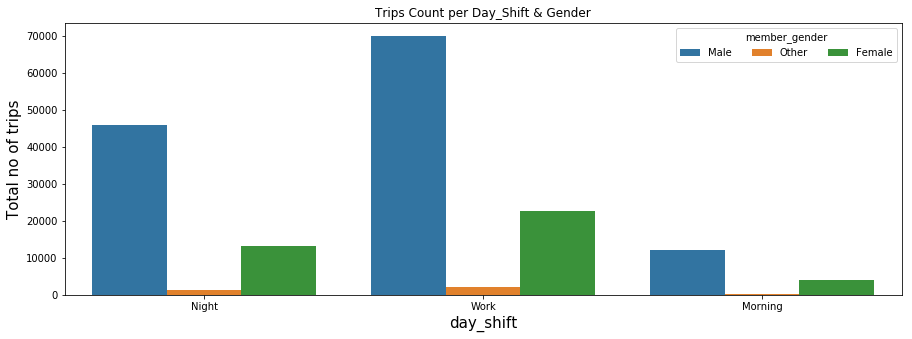

In [57]:
plt.figure(figsize = [15,5])
ax = sb.countplot(data =df_New, x = 'day_shift', hue = 'member_gender')
plt.legend(loc = 1, ncol = 3, title = 'member_gender')
plt.xticks(rotation = 0)
plt.xlabel('day_shift', size = 15);
plt.title('Trips Count per Day_Shift & Gender')
ax.set_ylabel("Total no of trips", size = 15);

most males and females prefare to take ride in work shift

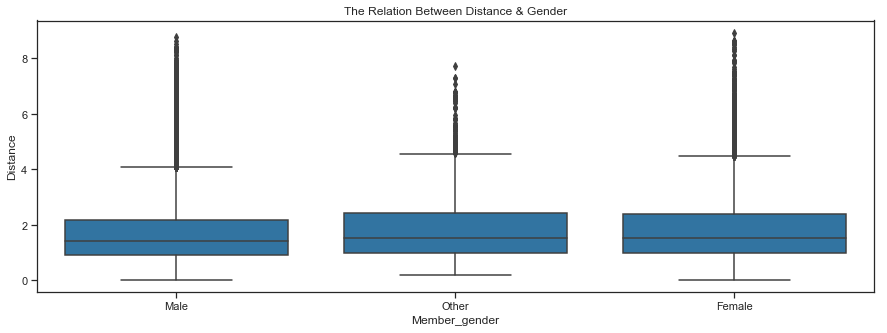

In [64]:
plt.figure(figsize = [15,5])
sb.boxplot(data = df_New, x = 'member_gender', y = 'distance', color = b_color)
plt.xlabel('Member_gender')
plt.ylabel('Distance')
plt.title('The Relation Between Distance & Gender')
plt.show()

There is a symetry of distance distribution for diffrent gender

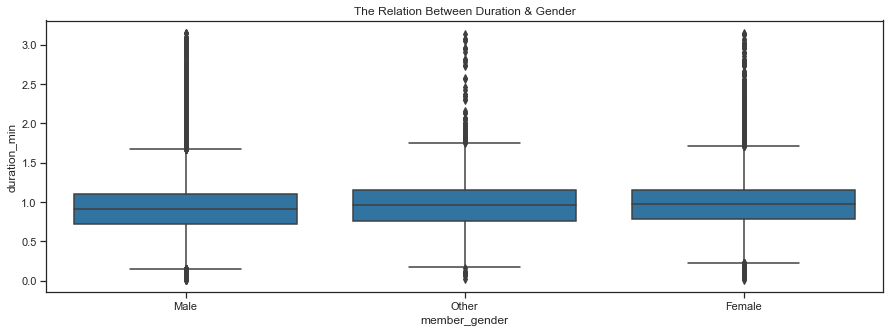

In [65]:
plt.figure(figsize = [15,5])
sb.boxplot(data = df_New, x = 'member_gender', y = np.log10(df['duration_min']), color = b_color)
plt.xlabel('member_gender')
plt.ylabel('duration_min')
plt.title('The Relation Between Duration & Gender')
plt.show()

There is a symetry of ride duration distribution for diffrent gender

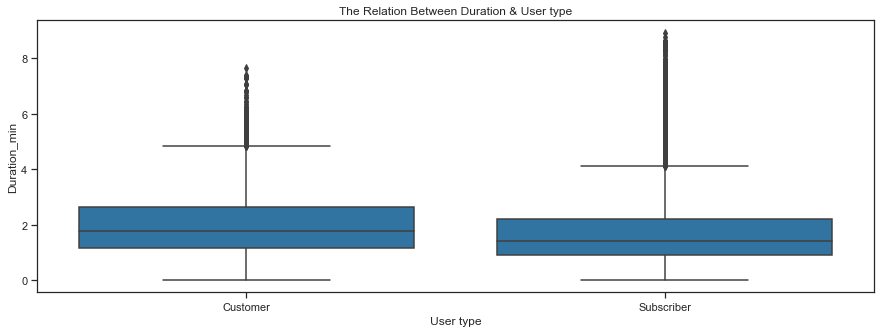

In [72]:
plt.figure(figsize = [15,5])
sb.boxplot(data = df_New, x = 'user_type', y = 'distance', color = b_color)
plt.xlabel('User type')
plt.ylabel('Duration_min')
plt.title('The Relation Between Duration & User type')
plt.show()

- User type make some change in distance

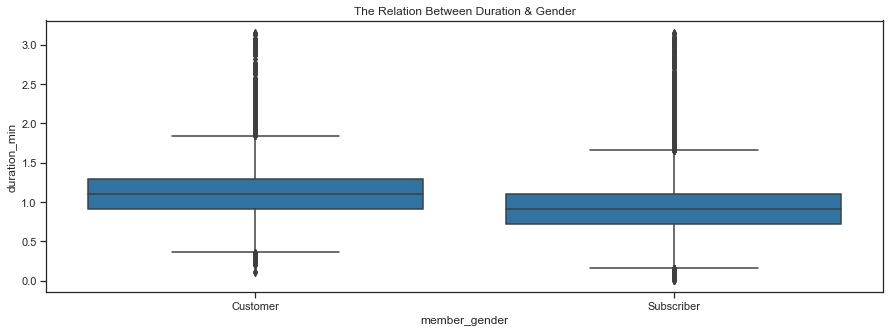

In [67]:
plt.figure(figsize = [15,5])
sb.boxplot(data = df_New, x = 'user_type', y = np.log10(df['duration_min']), color = b_color)
plt.xlabel('member_gender')
plt.ylabel('duration_min')
plt.title('The Relation Between Duration & Gender')
plt.show()

- User type make some change in ride duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Its clear that most of members are youth('member_age')
> Males completely dominate females throughout the week days & Females throughout the week days all most the same.(member_gender with start_weekDay).
>Subscriber users completely dominate Customer users throughout the week days & Customer users throughout the week days all most the same.(user_type with start_weekDay).


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

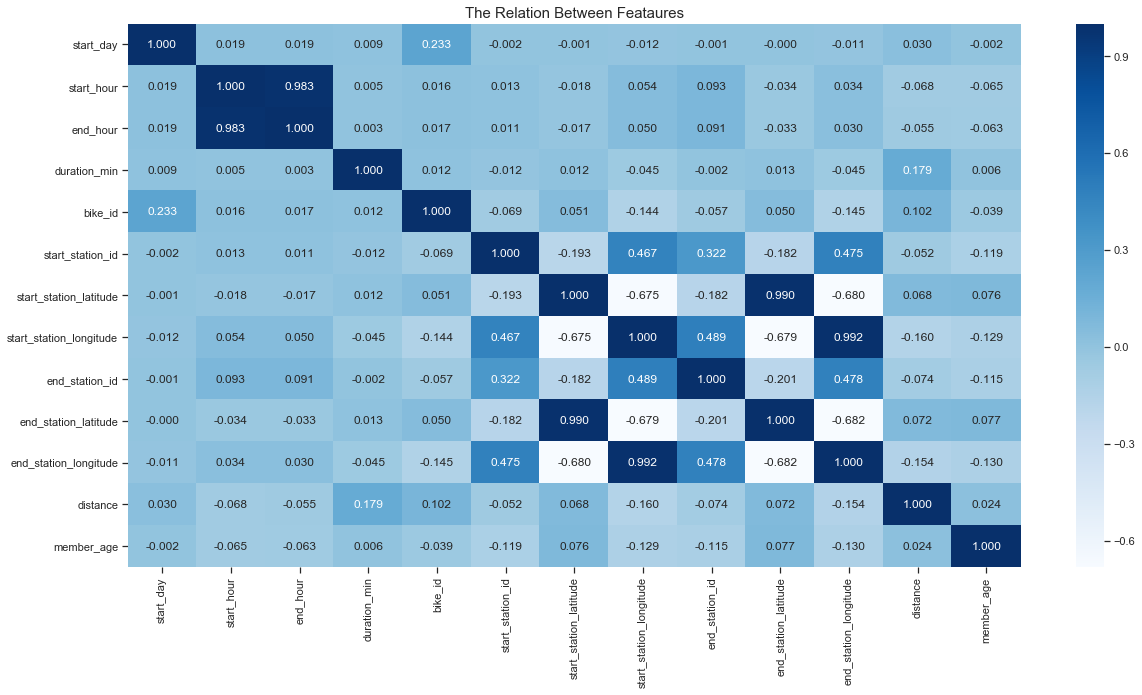

In [68]:
plt.figure(figsize = [20,10])
sb.heatmap(df_New.corr(), annot = True, fmt = '.3f', cmap = 'Blues')
plt.title('The Relation Between Feataures', size = 15)
plt.show()

The higher corrlation apper between station features 

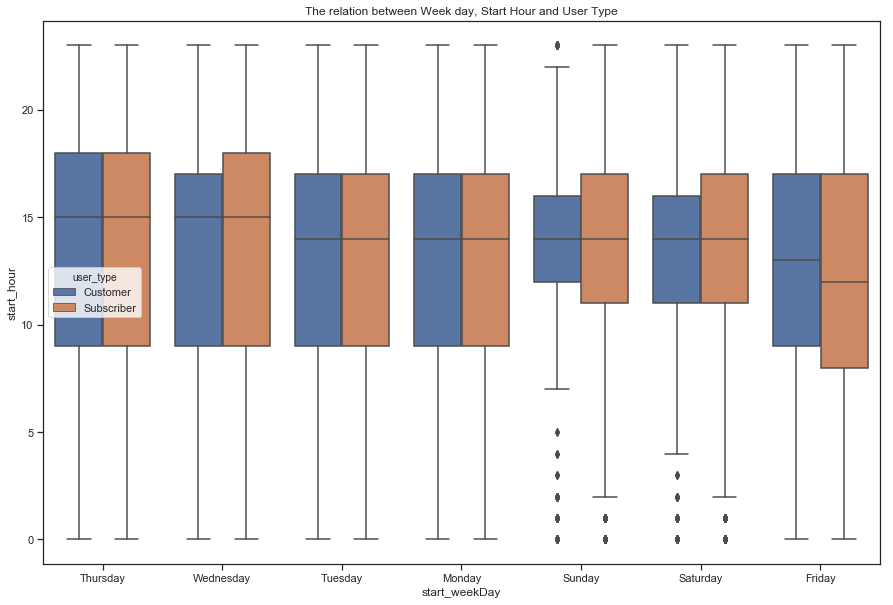

In [69]:

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax=sb.boxplot(x="start_weekDay", y="start_hour", hue="user_type",data=df_New)
ax.set_title('The relation between Week day, Start Hour and User Type')

plt.show()

 - Customer users number decreases in sunday and saturday

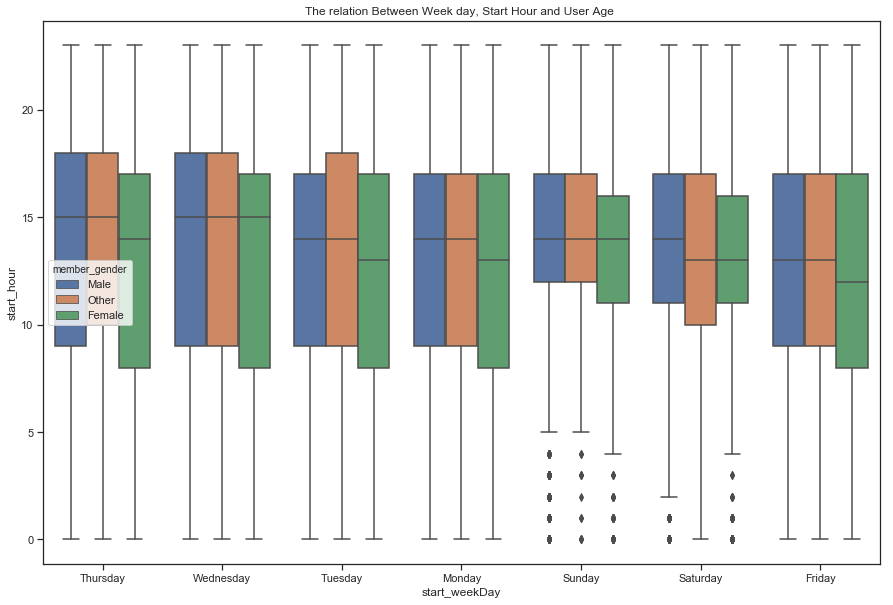

In [70]:

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax=sb.boxplot(x="start_weekDay", y="start_hour", hue="member_gender",data=df_New)
ax.set_title('The relation Between Week day, Start Hour and User Age ')
plt.show()

- Females takes ride early than males especially in some weekend(Sunday & Saturday).

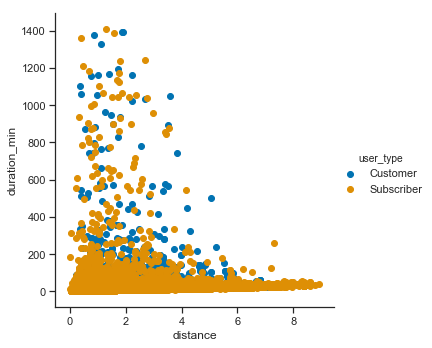

In [71]:
g = sb.FacetGrid(data = df_New, hue = 'user_type', height = 5,palette = 'colorblind')
g.map(plt.scatter, 'distance', 'duration_min')
g.add_legend()
plt.show()

users type are similar in relation with duration and distance and they are interacting 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>- Customer users number decreases in sunday and saturday
>- Females takes ride early than males especially in some weekend(Sunday & Saturday).
>- Users type are similar in relation with duration and distance and they are interacting 

### Were there any interesting or surprising interactions between features?

> The higher corrlation apper between station features make mapping station features will be interesting 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!